In [20]:
#Step 1 : Importing Libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt

print("Libraries Are Imported")

Libraries Are Imported


In [21]:
#step 2 : Preparing Data 
datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator=datagen.flow_from_directory( #1664 images in folder/into 5 folders
    'Rice_Plant/train',
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator=datagen.flow_from_directory( #415 images as validation
    'Rice_Plant/train', 
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)
print("Images Are Trained in 128x128 Pixel Values !")

Found 1664 images belonging to 5 classes.
Found 415 images belonging to 5 classes.
Images Are Trained in 128x128 Pixel Values !


In [25]:
#step3 :Build a CNN Model 
model=Sequential([
    tf.keras.Input(shape=(128,128,3)),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(3,3)),

    Conv2D(64,(3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128,(3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(5,activation='softmax')

])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary
print("CNN Model Ready To Train")

CNN Model Ready To Train


In [ ]:
#step4 : Train The Model

history=model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator
)
print("Model Trained Successfully")

Epoch 1/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 39s 744ms/step - accuracy: 0.5540 - loss: 1.0446 - val_accuracy: 0.6361 - val_loss: 0.9499
Epoch 2/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 35s 680ms/step - accuracy: 0.5888 - loss: 0.9804 - val_accuracy: 0.6747 - val_loss: 0.7795
Epoch 3/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 35s 671ms/step - accuracy: 0.6611 - loss: 0.8312 - val_accuracy: 0.8048 - val_loss: 0.5795
Epoch 4/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 34s 660ms/step - accuracy: 0.7375 - loss: 0.6810 - val_accuracy: 0.6988 - val_loss: 0.7387
Epoch 5/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 34s 660ms/step - accuracy: 0.6987 - loss: 0.7560 - val_accuracy: 0.8169 - val_loss: 0.4756
Epoch 6/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 34s 657ms/step - accuracy: 0.7530 - loss: 0.6575 - val_accuracy: 0.8386 - val_loss: 0.4837
Epoch 7/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 34s 663ms/step - accuracy: 0.7641 - loss: 0.6157 - val_accuracy: 0.8554 - val_loss: 0.4190
Epoch 8/15
52/52 ━━━━━━━━━━━━━━━━━━━━ 35s 665ms/step - accuracy: 0.7754 - loss: 0.5872 - val_accu

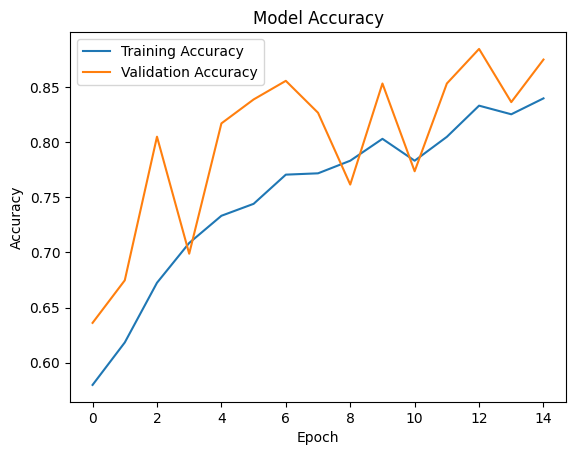

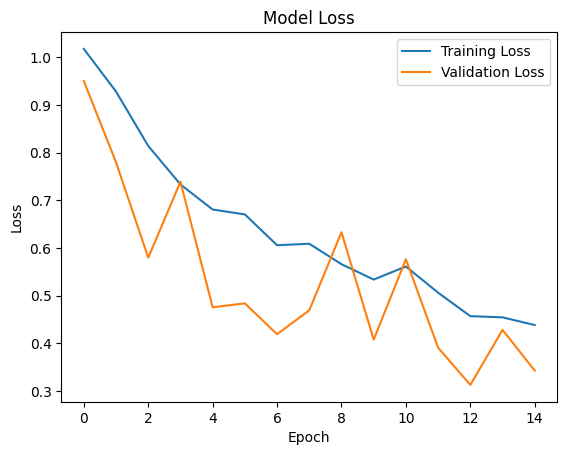

Training Accuracy :83.95%
Validation Accuracy :87.47%


In [31]:
#step5 : Plotting Accuracy And Loss 
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

#loss
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'], label="Validation Loss")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Epoch')
plt.legend()
plt.show()

train_acc=history.history['accuracy'][-1]
val_acc=history.history['val_accuracy'][-1]

print("Training Accuracy :{:.2f}%".format(train_acc*100))
print("Validation Accuracy :{:.2f}%".format(val_acc*100))

In [ ]:
#step6 : Saving TrainedModel
model.save('rice_disease_cnn.h5')
print("Model Saved Succesfully.")

Model Saved Succesfully.
